# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [1]:
import os
import glob
import pandas as pd


#### To-Do - Use glob to match the pattern "csv"

In [2]:
os.getcwd()

'C:\\Users\\ubec\\Documents\\Pandas-Analytics-Project'

#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [3]:
lag = pd.read_csv('Lagos_Branch.csv')
abj = pd.read_csv('abuja_branch.csv')
phc = pd.read_csv('Port_Harcourt_Branch.csv')

#c_xyz is short for Company XYZ
c_xyz = pd.concat([lag, abj, phc], ignore_index=True)
c_xyz.to_csv('c_xyz.csv')

In [4]:
xyz_df = pd.read_csv('c_xyz.csv',index_col='Unnamed: 0', squeeze=True)

C:\Users\ubec\AppData\Local\Temp\ipykernel_9832\1800681773.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  xyz_df = pd.read_csv('c_xyz.csv',index_col='Unnamed: 0', squeeze=True)


In [5]:
xyz_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,148-41-7930,C,Port Harcourt,Normal,Male,Health and beauty,35985.6,7,12594.96,264494.16,1/23/2019,10:33,Cash,251899.2,4.761905,12594.96,6.1
996,189-40-5216,C,Port Harcourt,Normal,Male,Electronic accessories,34693.2,7,12142.62,254995.02,1/9/2019,11:40,Cash,242852.4,4.761905,12142.62,6.0
997,267-62-7380,C,Port Harcourt,Member,Male,Electronic accessories,29642.4,10,14821.20,311245.20,3/29/2019,19:12,Epay,296424.0,4.761905,14821.20,4.3
998,652-49-6720,C,Port Harcourt,Member,Female,Electronic accessories,21942.0,1,1097.10,23039.10,2/18/2019,11:40,Epay,21942.0,4.761905,1097.10,5.9


## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [7]:
xyz_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8


In [8]:
xyz_df.shape

(1000, 17)

In [9]:
xyz_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [10]:
xyz_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000




##Statistical Summary

From the Company XYZ with the data provided, it has 1000 rows and 17 columns. The columns contain information on the Branches, Customer type, Product line etc from the data recorded; the mean Unit Price is (20041.96) the minimum Unit price is (3628.8) the maximum Unit price is (35985.6) Other information on Tax percentage, Quantity, Gross Income etc can be derived from the table above.


In [11]:

xyz_df.isnull()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
xyz_df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [13]:

xyz_df.isnull().sum().sum()

0

In [14]:
xyz_df.notna()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
996,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
997,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
998,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [15]:
xyz_df.notna().sum()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

In [16]:
xyz_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features

In [17]:
import datetime as dt

In [18]:
xyz_df['Date_time'] = xyz_df['Date'] + ' ' + xyz_df['Time']

In [19]:
xyz_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Date_time
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1,1/5/2019 13:08
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4,3/3/2019 13:23
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4,1/27/2019 20:33
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3,2/8/2019 10:37
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8,2/25/2019 14:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,148-41-7930,C,Port Harcourt,Normal,Male,Health and beauty,35985.6,7,12594.96,264494.16,1/23/2019,10:33,Cash,251899.2,4.761905,12594.96,6.1,1/23/2019 10:33
996,189-40-5216,C,Port Harcourt,Normal,Male,Electronic accessories,34693.2,7,12142.62,254995.02,1/9/2019,11:40,Cash,242852.4,4.761905,12142.62,6.0,1/9/2019 11:40
997,267-62-7380,C,Port Harcourt,Member,Male,Electronic accessories,29642.4,10,14821.20,311245.20,3/29/2019,19:12,Epay,296424.0,4.761905,14821.20,4.3,3/29/2019 19:12
998,652-49-6720,C,Port Harcourt,Member,Female,Electronic accessories,21942.0,1,1097.10,23039.10,2/18/2019,11:40,Epay,21942.0,4.761905,1097.10,5.9,2/18/2019 11:40


In [20]:
del (xyz_df['Date'], xyz_df['Time'])

In [21]:
xyz_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Date_time
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,Epay,188218.8,4.761905,9410.94,9.1,1/5/2019 13:08
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,Card,116751.6,4.761905,5837.58,7.4,3/3/2019 13:23
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,Epay,167673.6,4.761905,8383.68,8.4,1/27/2019 20:33
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,Epay,217501.2,4.761905,10875.06,5.3,2/8/2019 10:37
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,Epay,148694.4,4.761905,7434.72,5.8,2/25/2019 14:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,148-41-7930,C,Port Harcourt,Normal,Male,Health and beauty,35985.6,7,12594.96,264494.16,Cash,251899.2,4.761905,12594.96,6.1,1/23/2019 10:33
996,189-40-5216,C,Port Harcourt,Normal,Male,Electronic accessories,34693.2,7,12142.62,254995.02,Cash,242852.4,4.761905,12142.62,6.0,1/9/2019 11:40
997,267-62-7380,C,Port Harcourt,Member,Male,Electronic accessories,29642.4,10,14821.20,311245.20,Epay,296424.0,4.761905,14821.20,4.3,3/29/2019 19:12
998,652-49-6720,C,Port Harcourt,Member,Female,Electronic accessories,21942.0,1,1097.10,23039.10,Epay,21942.0,4.761905,1097.10,5.9,2/18/2019 11:40


In [22]:
xyz_df = xyz_df[['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
               'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date_time', 'Payment',
                 'cogs', 'gross margin percentage', 'gross income', 'Rating']]

In [23]:
xyz_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date_time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019 13:08,Epay,188218.8,4.761905,9410.94,9.1
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019 13:23,Card,116751.6,4.761905,5837.58,7.4
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019 20:33,Epay,167673.6,4.761905,8383.68,8.4
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019 10:37,Epay,217501.2,4.761905,10875.06,5.3
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019 14:36,Epay,148694.4,4.761905,7434.72,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,148-41-7930,C,Port Harcourt,Normal,Male,Health and beauty,35985.6,7,12594.96,264494.16,1/23/2019 10:33,Cash,251899.2,4.761905,12594.96,6.1
996,189-40-5216,C,Port Harcourt,Normal,Male,Electronic accessories,34693.2,7,12142.62,254995.02,1/9/2019 11:40,Cash,242852.4,4.761905,12142.62,6.0
997,267-62-7380,C,Port Harcourt,Member,Male,Electronic accessories,29642.4,10,14821.20,311245.20,3/29/2019 19:12,Epay,296424.0,4.761905,14821.20,4.3
998,652-49-6720,C,Port Harcourt,Member,Female,Electronic accessories,21942.0,1,1097.10,23039.10,2/18/2019 11:40,Epay,21942.0,4.761905,1097.10,5.9


#### To-Do - Check the datatype to confirm if it's in `datetime`

In [24]:
xyz_df['Date_time'] = pd.to_datetime(xyz_df['Date_time'])

In [25]:
xyz_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date_time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,2019-01-05 13:08:00,Epay,188218.8,4.761905,9410.94,9.1
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,2019-03-03 13:23:00,Card,116751.6,4.761905,5837.58,7.4
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,2019-01-27 20:33:00,Epay,167673.6,4.761905,8383.68,8.4
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2019-02-08 10:37:00,Epay,217501.2,4.761905,10875.06,5.3
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2019-02-25 14:36:00,Epay,148694.4,4.761905,7434.72,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,148-41-7930,C,Port Harcourt,Normal,Male,Health and beauty,35985.6,7,12594.96,264494.16,2019-01-23 10:33:00,Cash,251899.2,4.761905,12594.96,6.1
996,189-40-5216,C,Port Harcourt,Normal,Male,Electronic accessories,34693.2,7,12142.62,254995.02,2019-01-09 11:40:00,Cash,242852.4,4.761905,12142.62,6.0
997,267-62-7380,C,Port Harcourt,Member,Male,Electronic accessories,29642.4,10,14821.20,311245.20,2019-03-29 19:12:00,Epay,296424.0,4.761905,14821.20,4.3
998,652-49-6720,C,Port Harcourt,Member,Female,Electronic accessories,21942.0,1,1097.10,23039.10,2019-02-18 11:40:00,Epay,21942.0,4.761905,1097.10,5.9


In [26]:
xyz_df['Date_time'].dtype

dtype('<M8[ns]')

In [27]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [28]:
xyz_df['Date_time'].dtype


dtype('<M8[ns]')

## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [29]:
xyz_df['Date_time']

0     2019-01-05 13:08:00
1     2019-03-03 13:23:00
2     2019-01-27 20:33:00
3     2019-02-08 10:37:00
4     2019-02-25 14:36:00
              ...        
995   2019-01-23 10:33:00
996   2019-01-09 11:40:00
997   2019-03-29 19:12:00
998   2019-02-18 11:40:00
999   2019-01-29 13:46:00
Name: Date_time, Length: 1000, dtype: datetime64[ns]

In [30]:
xyz_df['Day'] = xyz_df['Date_time'].dt.day

In [31]:
xyz_df['Hour'] = xyz_df['Date_time'].dt.hour

In [32]:
xyz_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date_time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Hour
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,2019-01-05 13:08:00,Epay,188218.8,4.761905,9410.94,9.1,5,13
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,2019-03-03 13:23:00,Card,116751.6,4.761905,5837.58,7.4,3,13
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,2019-01-27 20:33:00,Epay,167673.6,4.761905,8383.68,8.4,27,20
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2019-02-08 10:37:00,Epay,217501.2,4.761905,10875.06,5.3,8,10
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2019-02-25 14:36:00,Epay,148694.4,4.761905,7434.72,5.8,25,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,148-41-7930,C,Port Harcourt,Normal,Male,Health and beauty,35985.6,7,12594.96,264494.16,2019-01-23 10:33:00,Cash,251899.2,4.761905,12594.96,6.1,23,10
996,189-40-5216,C,Port Harcourt,Normal,Male,Electronic accessories,34693.2,7,12142.62,254995.02,2019-01-09 11:40:00,Cash,242852.4,4.761905,12142.62,6.0,9,11
997,267-62-7380,C,Port Harcourt,Member,Male,Electronic accessories,29642.4,10,14821.20,311245.20,2019-03-29 19:12:00,Epay,296424.0,4.761905,14821.20,4.3,29,19
998,652-49-6720,C,Port Harcourt,Member,Female,Electronic accessories,21942.0,1,1097.10,23039.10,2019-02-18 11:40:00,Epay,21942.0,4.761905,1097.10,5.9,18,11


In [33]:
xyz_df['Hour'].nunique()

11

In [34]:
xyz_df['Hour'].unique()

array([13, 20, 10, 14, 17, 16, 19, 11, 18, 12, 15], dtype=int64)

## Step 4 - Unique Values in Columns

In [35]:
object_column = [col for col in xyz_df.columns if xyz_df[col].dtype =='object']
object_column

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [36]:
xyz_df[object_column]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Payment
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,Epay
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,Card
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,Epay
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,Epay
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,Epay
...,...,...,...,...,...,...,...
995,148-41-7930,C,Port Harcourt,Normal,Male,Health and beauty,Cash
996,189-40-5216,C,Port Harcourt,Normal,Male,Electronic accessories,Cash
997,267-62-7380,C,Port Harcourt,Member,Male,Electronic accessories,Epay
998,652-49-6720,C,Port Harcourt,Member,Female,Electronic accessories,Epay


#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [37]:
xyz_df['Invoice ID'].unique().tolist()

['750-67-8428',
 '631-41-3108',
 '123-19-1176',
 '373-73-7910',
 '355-53-5943',
 '665-32-9167',
 '365-64-0515',
 '252-56-2699',
 '829-34-3910',
 '656-95-9349',
 '765-26-6951',
 '329-62-1586',
 '636-48-8204',
 '549-59-1358',
 '227-03-5010',
 '189-17-4241',
 '848-62-7243',
 '595-11-5460',
 '129-29-8530',
 '272-65-1806',
 '162-48-8011',
 '106-35-6779',
 '635-40-6220',
 '817-48-8732',
 '199-75-8169',
 '877-22-3308',
 '232-11-3025',
 '382-03-4532',
 '287-21-9091',
 '381-20-0914',
 '633-44-8566',
 '504-35-8843',
 '873-51-0671',
 '594-34-4444',
 '865-92-6136',
 '212-62-1842',
 '704-48-3927',
 '630-74-5166',
 '645-44-1170',
 '642-32-2990',
 '638-60-7125',
 '668-90-8900',
 '870-54-3162',
 '802-70-5316',
 '700-81-1757',
 '354-39-5160',
 '575-30-8091',
 '239-10-7476',
 '685-64-1609',
 '238-49-0436',
 '746-94-0204',
 '782-95-9291',
 '275-28-0149',
 '101-17-6199',
 '687-47-8271',
 '796-32-9050',
 '105-31-1824',
 '249-42-3782',
 '827-26-2100',
 '175-54-2529',
 '407-63-8975',
 '851-28-6367',
 '586-25

In [38]:
xyz_df['City'].unique().tolist()

['Lagos', 'Abuja', 'Port Harcourt']

In [39]:
xyz_df['Customer type'].unique().tolist()

['Member', 'Normal']

In [40]:
xyz_df['Gender'].unique().tolist()

['Female', 'Male']

In [41]:
xyz_df['Product line'].unique().tolist()

['Health and beauty',
 'Home and lifestyle',
 'Sports and travel',
 'Electronic accessories',
 'Food and beverages',
 'Fashion accessories']

In [42]:
xyz_df['Payment'].unique().tolist()

['Epay', 'Card', 'Cash']

In [43]:
xyz_df['Invoice ID'].value_counts()

750-67-8428    1
303-96-2227    1
746-04-1077    1
448-34-8700    1
452-04-8808    1
              ..
347-56-2442    1
849-09-3807    1
692-92-5582    1
351-62-0822    1
233-67-5758    1
Name: Invoice ID, Length: 1000, dtype: int64

In [44]:
xyz_df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [45]:
xyz_df['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [46]:
xyz_df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [47]:
xyz_df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [48]:
xyz_df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [49]:
xyz_df['Payment'].value_counts()

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64

## Step 5 - Aggregration with GroupBy

In [50]:
city_grouping = xyz_df.groupby('City')

In [51]:
city_grouping.agg ({'Unit price': ['sum','mean'],
                  'Tax 5%': ['sum','mean'],
                  'cogs': ['sum','mean']})

Unit price                    Tax 5%                     cogs  \
                     sum          mean         sum         mean         sum   
City                                                                          
Abuja          6652396.8  20037.339759  1820531.52  5483.528675  36410630.4   
Lagos          6705176.4  19721.107059  1820577.78  5354.640529  36411555.6   
Port Harcourt  6684393.6  20379.248780  1895463.54  5778.852256  37909270.8   

                              
                        mean  
City                          
Abuja          109670.573494  
Lagos          107092.810588  
Port Harcourt  115577.045122

In [52]:
city_grouping = xyz_df.groupby('City')

In [53]:
city_gross_income = city_grouping.agg({'gross income': 'sum'})
city_gross_income

,gross income
City,
Abuja,1820531.52
Lagos,1820577.78
Port Harcourt,1895463.54


In [54]:
city_gross_income['gross income'] ==max(city_gross_income['gross income'])

City
Abuja            False
Lagos            False
Port Harcourt     True
Name: gross income, dtype: bool

In [55]:
city_gross_income[city_gross_income['gross income'] == max(city_gross_income['gross income'])]

,gross income
City,
Port Harcourt,1895463.54


In [56]:
#Port Harcourt is city with the Highest Gross Income

## Step 6 - Data Visualization

#Brach with the highest sale

Text(0.5, 1.0, 'Branch with Highest Sales Record')

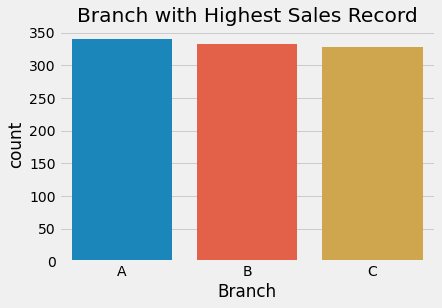

In [57]:
sns.countplot(x='Branch', data=xyz_df).set_title('Branch with Highest Sales Record')

##From the graph, The Branch with the Highest Sales Record is Branch A; Lagos

Text(0.5, 1.0, 'Most used Payment Method')

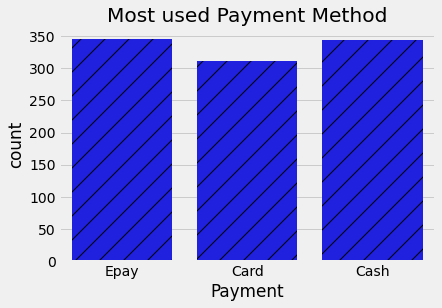

In [58]:
sns.countplot(x='Payment', color='blue', hatch='/', data=xyz_df).set_title('Most used Payment Method')

In [59]:

##The Most used Payment Method is Epay from the Graph

Text(0.5, 1.0, 'City with Most Sales')

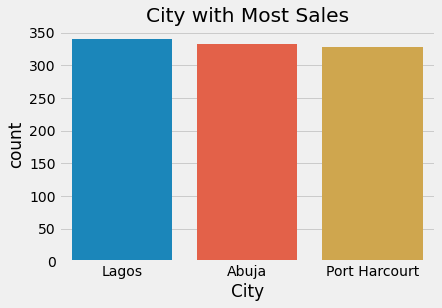

In [60]:
sns.countplot(x='City', data=xyz_df).set_title('City with Most Sales')

In [61]:
##The city with most Sales is Lagos from the graph

Text(0.5, 1.0, 'Highest and Lowest Sold Product Line')

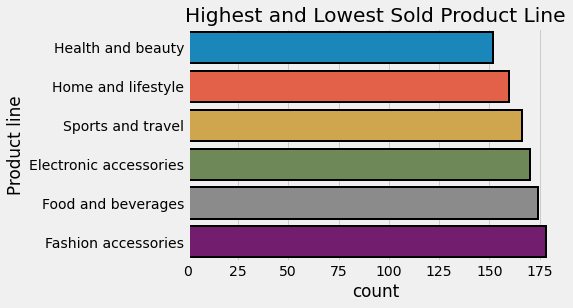

In [62]:
sns.countplot(y='Product line', data=xyz_df, lw=2, ec='black').set_title('Highest and Lowest Sold Product Line')

In [63]:
##From the graph above the Highest Sold Product Line is Fashion accessories, and The Lowest Sold Product line is Health and Beauty.

Text(0.5, 1.0, 'Payment Channel used the most')

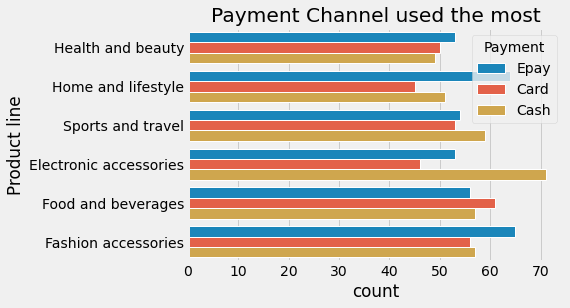

In [64]:
sns.countplot(y='Product line', hue='Payment', lw=1, ec='white', data=xyz_df).set_title('Payment Channel used the most')

<AxesSubplot:xlabel='count', ylabel='Payment'>

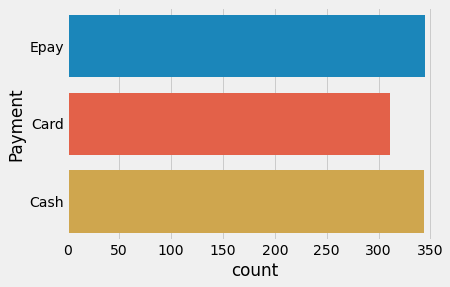

In [65]:
sns.countplot(y='Payment', data=xyz_df)

Text(0.5, 1.0, 'Payment Channel for each branch')

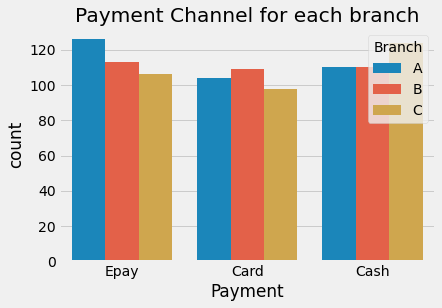

In [66]:
sns.countplot(x='Payment',hue='Branch', data=xyz_df).set_title('Payment Channel for each branch')

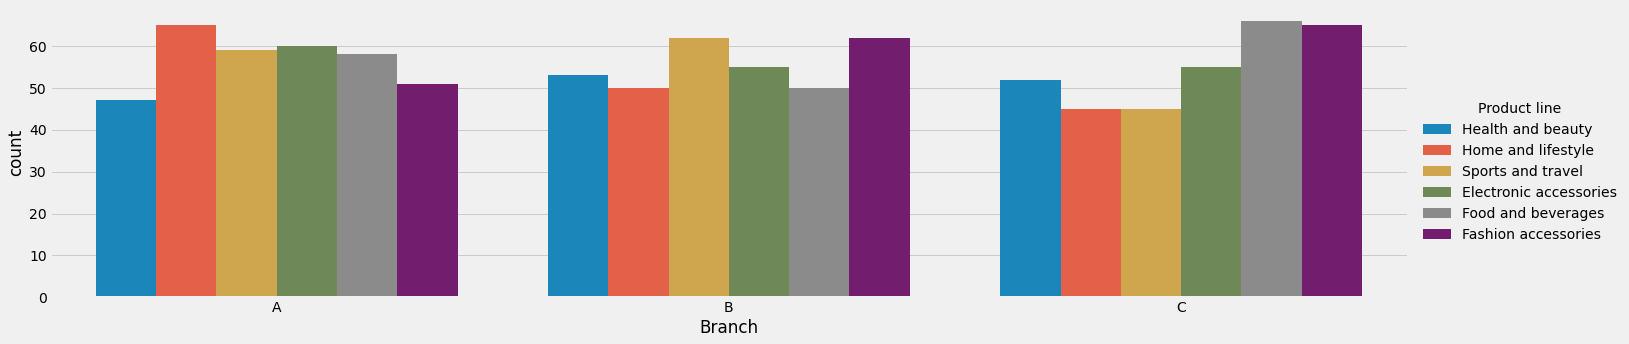

In [67]:
sns.catplot(x='Branch',hue='Product line', data=xyz_df, aspect=4, kind='count')

In [68]:
branch = xyz_df.groupby("Branch")
branch.agg({'Rating': 'mean'})

,Rating
Branch,
A,7.027059
B,6.818072
C,7.072866


Text(0.5, 1.0, 'Branch with lowest Rating')

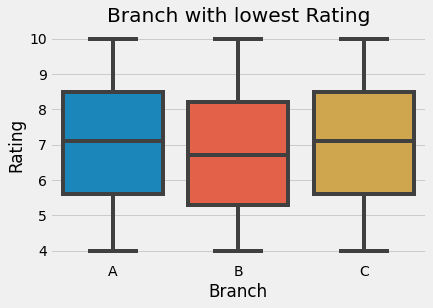

In [69]:
sns.boxplot(x='Branch', y='Rating', data=xyz_df).set_title('Branch with lowest Rating')

In [70]:
##Branch B

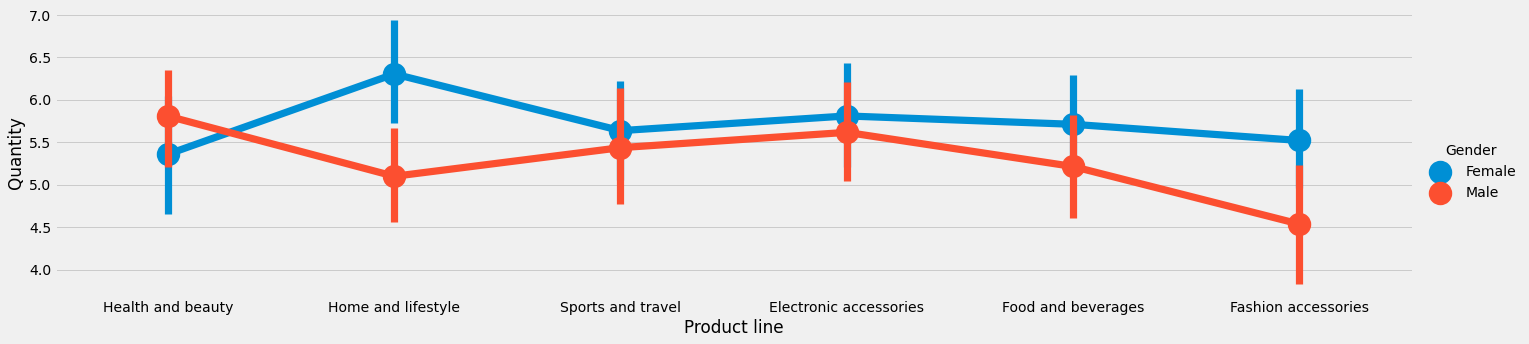

In [71]:
sns.catplot(x='Product line', y='Quantity', hue='Gender', data=xyz_df, aspect=4, kind='point')

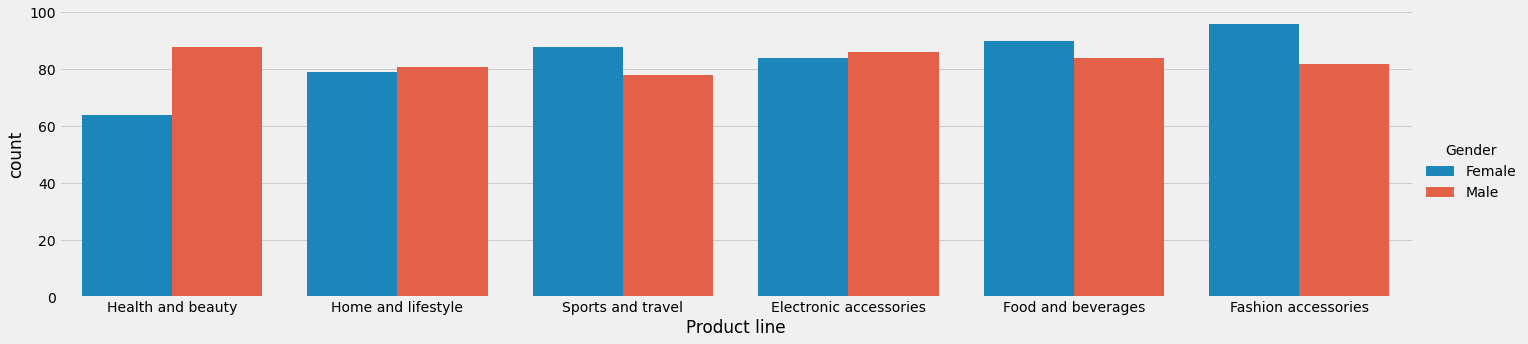

In [72]:
sns.catplot(x='Product line', hue='Gender', data=xyz_df, aspect=4, kind='count')

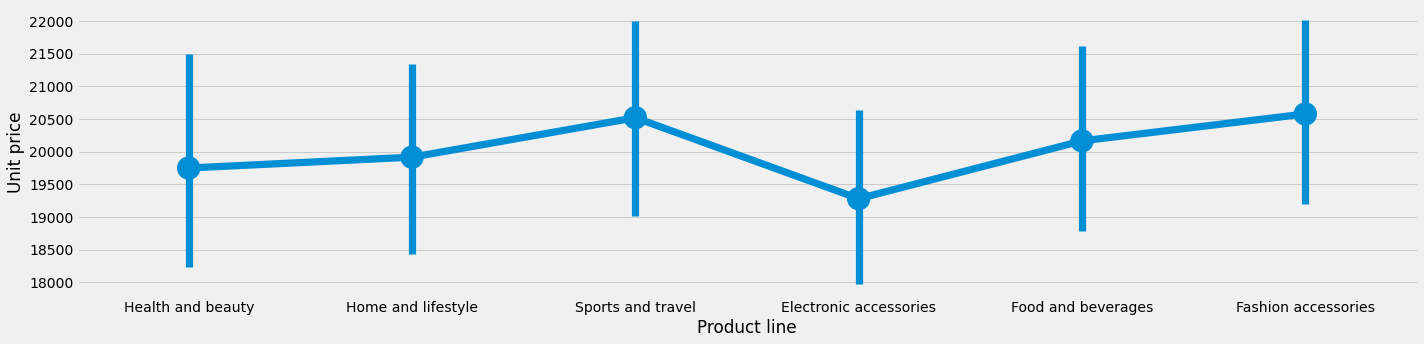

In [73]:
sns.catplot(x='Product line', y='Unit price', data=xyz_df, aspect=4, kind='point')

In [74]:
#STANDOUT SECTION

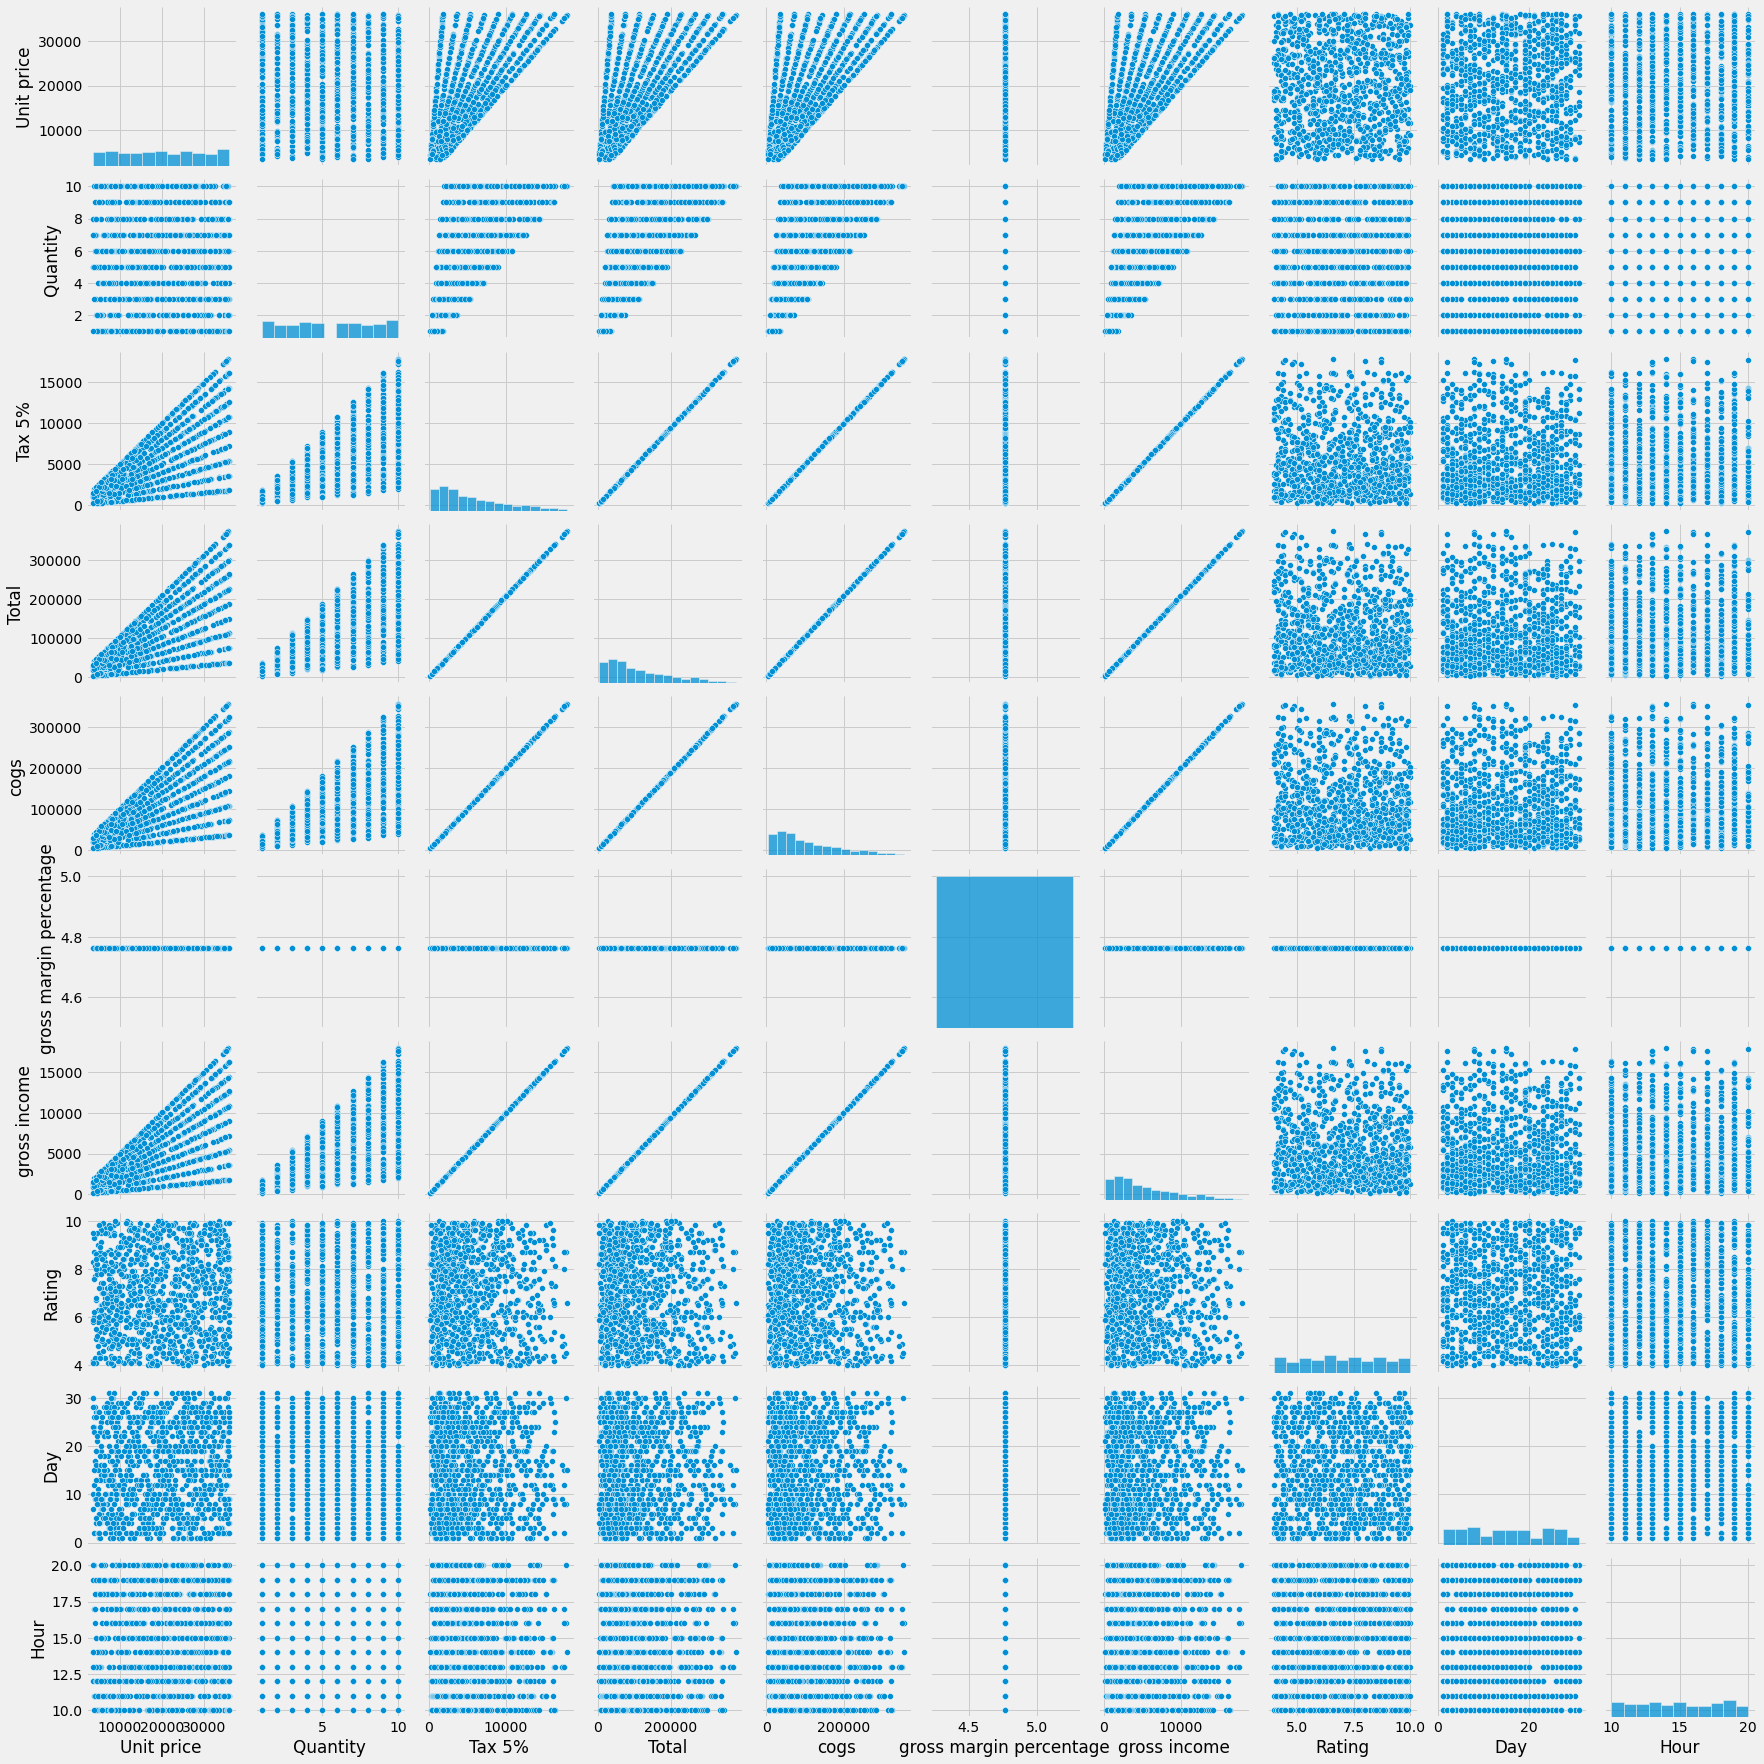

In [75]:
sns.pairplot(xyz_df)

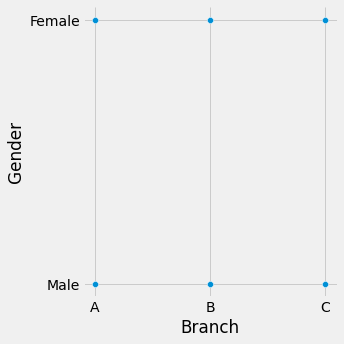

In [76]:
sns.relplot(data= xyz_df, x='Branch', y='Gender')